<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Project - Numerical Integration

Student ID 1130565<br>
University of Manchester  
March 2025

We first initialise our Python interpreter

In [26]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In this program, the mass and spring constant are kept constant as they are given to us. The value of the mass is 3.62 kg and the spring constant is 2.14 N/m

In [27]:
# Defining constant parameters (These will be global as they will not be changed)
m = 3.62         # mass (kg)
k = 2.14         # spring constant (N/m)

The first method of numerical integragtion that we are going to define is Euler's method.

For Euler's method, the position is incremented by the formula $x_{n+1} = x_{n} + hv_{n}$ where h is the size of the step and v is the velocity

The velocity is incremented by the formula $v_{n+1} = v_{n} + ha$ where a is the accleration

The acceleration is given by the formula $a = -\frac{kx_{n}}{m}  -\frac{bv_{n}}{m}$ 

In [28]:
#Defining Euler's method
def euler_method(x_0, v_0, h, n_steps, b):
    global k
    global m
    # Create empty arrays with length n_steps for the values of x and v
    x = np.zeros(n_steps) 
    v = np.zeros(n_steps) 
    
    # Assign initial conditions
    x[0] = x_0
    v[0] = v_0
    
    #Calculating the values of x and v after each iteration
    for i in range(n_steps-1):
        _a = -(k/m)* x[i] - (b/m)*v[i] #Calculate acceleration
        x[i+1] = x[i] + h * v[i]
        v[i+1] = v[i] + h * _a
    return x, v

The second method of numerical integragtion that we are going to define is the Improved Euler's method.

For this method, the position is incremented by the formula $x_{n+1} = x_{n} + hv_{n} + \frac{h^{2}a}{2}$ where h is the size of the step, v is the velocity and a is the acceleration

The velocity is still incremented by the formula $v_{n+1} = v_{n} + ha$ where a is the accleration

The acceleration is still given by the formula $a = -\frac{kx_{n}}{m}  -\frac{bv_{n}}{m}$

In [29]:
#Defining Improved Euler's method
def improved_euler_method(x_0, v_0, h, n_steps, b=2.78):
    global k
    global m
    # Create empty arrays with length n_steps for the values of x and v
    x = np.zeros(n_steps) 
    v = np.zeros(n_steps) 
    
    # Assign initial conditions
    x[0] = x_0
    v[0] = v_0
    
    #Calculating the values of x and v after each iteration
    for i in range(n_steps-1):
        _a = -k* x[i]/m - b*v[i]/m #Calculate acceleration
        x[i+1] = x[i] + h * v[i] + (h**2)*_a/2
        v[i+1] = v[i] + h * _a
    return x, v

The third method of numerical integragtion that we are going to define is the Verlet's method.

For Verlet's method, the position is incremented by the formula $x_{n+1} = Ax_{n} + Bx_{n-1}$

A is given by $A = 2\frac{2m-kh^{2}}{C}$

B is given by $B = \frac{bh-2m}{C}$

C is given by $2m+bh$

As Verlet's method is not self starting, the first 2 terms in the program are generated using the improved euler method

In [30]:
def verlet_method(x_0, v_0, h, n_steps, b=2.78):
    global k
    global m
    # Create empty arrays with length n_steps for the values of x and v
    x = np.zeros(n_steps) 
    v = np.zeros(n_steps)   
    #Obtaining a second position as velet is not self-starting
    initial_x, initial_v = improved_euler_method(x_0, v_0, h, n_steps, b=0)
    x[0], x[1], v[0] = initial_x[0], initial_x[1], initial_v[0]
    
    #Defining constants in equation for position
    _C = 2*m+b*h
    _B = (b*h-2*m)/_C
    _A = 2*(2*m-k*h**2)/_C
    
    #Calculating the values of x and v after each iteration
    for i in range(1,n_steps-1):
        x[i+1] = _A*x[i]+_B*x[i-1]
        v[i] = (x[i+1] - x[i-1])/(2*h)
    return x, v  

The third method of numerical integragtion that we are going to define is the Euler-Cromer's method.

For this method, the position is incremented by the formula $x_{n+1} = x_{n} + hv_{n+1}$ 

The velocity is still incremented by the formula $v_{n+1} =  v_{n} - \frac{hkx_{n}}{m} - \frac{hbv_{n}}{m}$ where a is the accleration

The acceleration is still given by the formula $a = -\frac{kx_{n}}{m}  -\frac{bv_{n}}{m}$

In [31]:
#Defining Euler-Cromer method
def euler_cromer_method(x_0, v_0, h, n_steps, b):
    global k
    global m
    # Create empty arrays with length n_steps for the values of x and v
    x = np.zeros(n_steps) 
    v = np.zeros(n_steps) 
    
    # Assign initial conditions
    x[0] = x_0
    v[0] = v_0
    
    #Calculating the values of x and v after each iteration
    for i in range(n_steps-1):
        v[i+1] = v[i] - h * k * x[i] / m - h*b*v[i]/m
        x[i+1] = x[i] + h * v[i+1]
    return x, v

For values where the damping constant is less than the critical value, the solution for the oscillations can be written as $x = e^{-\frac{γ}{2}}(x_{0}cos(ωt) + \frac{v_{0}+\frac{γ}{2}x_{0}}{ω}sin(ωt))$

For values where the sqamping constant is equal to the critical value, the solution for the oscillations can be written as 
$x = e^{-\frac{γ}{2}}(x_{0} +(v_{0} + \frac{γ}{2}x_{0})t)$

For values where the damping constant is greater+ than the critical value, the solution for the oscillations can be written as $x = \frac{v_{0}+(A+B)x_{0}}{2B}e^{-(A-B)} + \frac{-v_{0}+(A-B)x_{0}}{2B}e^{-(A+B)}$ 
where $A = -\frac{γ}{2}$ and $B = A^{2} - \frac{k}{m}$

The velocitoes is given by the differntial of the positions

In [35]:
 def Analytic(x_0, v_0, time, b):
    global k
    global m
    # Constants
    if b < np.sqrt(4*k*m):
        _A = b/m
        _B = np.sqrt((k/m)-(_A**2/4))
        X = np.exp(-_A*time/2)*(x_0*np.cos(_B*time) + np.sin(_B*time)*(v_0+0.5*_A*x_0)/_B)
        V = -0.5*_A*X + np.exp(-_A*time/2)*(-x_0*_B*np.sin(_B*time) + np.cos(_B*time)*(v_0+0.5*_A*x_0))
        
    elif b == np.sqrt(4*k*m):
        _A = b/(2*m)
        X = np.exp(-_A*time)*(x_0+time*(v_0 + _A*x_0))    
        V = -_A*X + np.exp(-_A*time)*(v_0 + _A*x_0)
    else:
        _A = b/(2*m)
        _B = np.sqrt(_A**2 - k/m)
        _C = (v_0 + (_A+_B)*x_0)*np.exp(-(_A-_B)*time)/(2*_B)
        _D = (-v_0 + (_A-_B)*x_0)*np.exp(-(_A+_B)*time)/(2*_B)
        X = _C+_D
        V = (_B-_A)*_C-(_A+_B)*_D
    
    return X, V   


We then create a function that will calculate all relevent the values for a given damping and step size and create a subplot with each of the methods displayed on it. The plot is not displayed in this function but instead in the location that the function is called as it will be added to an existing plot

In [36]:
def plot_graphs(x0, v0, h, n_steps, b): 
    (x_euler, v_euler) = euler_method(x0, v0, h, n_steps, b)
    (x_improved_euler, v_improved_euler) = improved_euler_method(x0, v0, h, n_steps, b)
    (x_verlet, v_verlet) = verlet_method(x0, v0, h, n_steps, b)
    (x_euler_cromer, v_euler_cromer) = euler_cromer_method(x0, v0, h, n_steps, b)  
    
    # calc the analytic solution 
    x_analytical, _ = Analytic(x0, v0, np.arange(0,T,h), b) 

    #Get labels for the plots with the corresponding r^2 value
    _lbl_euler = r'Euler $r^{2}$ =' + '{:.3g}'.format(r2_score( x_analytical, x_euler),3)
    _lbl_improved_euler = r'Improved Euler $r^{2}$ =' + '{:.3g}'.format(r2_score(x_analytical, x_improved_euler),3)
    _lbl_verlet = r'Verlet $r^{2}$ =' + '{:.3g}'.format(r2_score(x_analytical, x_verlet),3)
    _lbl_euler_cromer = r'Euler-Cromer $r^{2}$ =' + '{:.3g}'.format(r2_score( x_analytical, x_euler_cromer),3) 

    # plot the outcome by displaying the position only 
    plt.plot(np.arange(0,T,h), x_euler,'r', label = _lbl_euler)
    plt.plot(np.arange(0,T,h), x_improved_euler,'b', label = _lbl_improved_euler)
    plt.plot(np.arange(0,T,h), x_verlet,'y', label = _lbl_verlet)
    plt.plot(np.arange(0,T,h), x_euler_cromer,'g', label = _lbl_euler_cromer)
    plt.plot(np.arange(0,T,h), x_analytical.real, 'k--', label = 'Analytical')

    # labeling plot 
    plt.title(f'Oscillation of a system with damping {b:.2f}')
    plt.xlabel("t (s)")
    plt.ylabel("x (mm)")
    
    # setting the range displayed
    plt.xlim(0, 25)
    plt.ylim(-2,4)
    plt.legend()

Iterates through different values of the damping constant and plots graphs of the resulting methods alongside the corresponding $r^{2}$ values each of them give when compared to the analytical solution

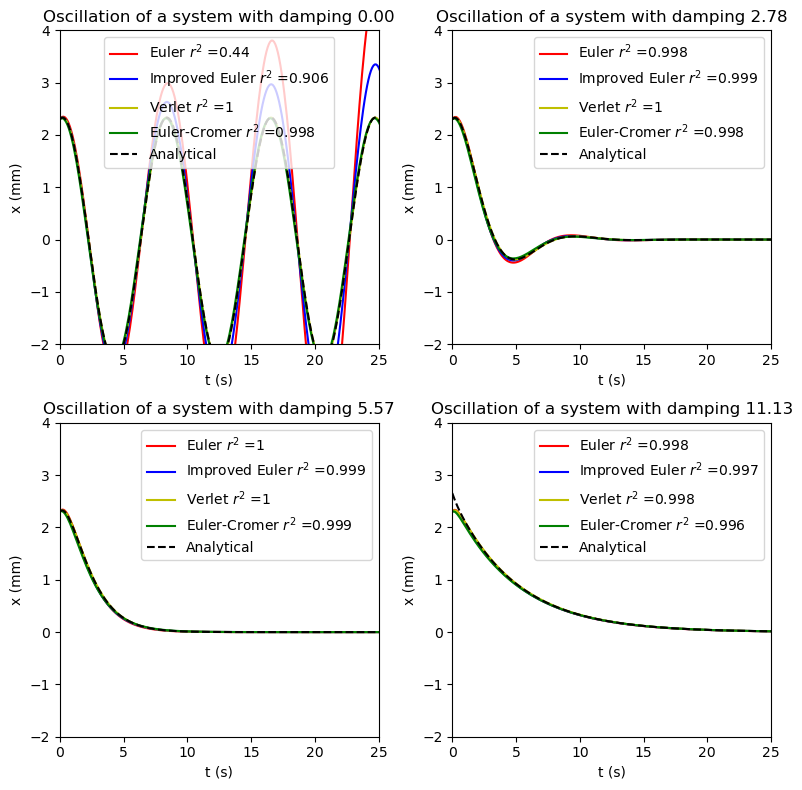

In [37]:
# Simulation parameters
h = 0.1           # time step (s)
T = 30           # total time (s)
n_steps = int(T/h)

# Initial conditions
x0 = 2.3         # initial position (m)
v0 = 0.3        # initial velocity (m/s)

b = [0, 0.5*np.sqrt(4*k*m), np.sqrt(4*k*m), 2*np.sqrt(4*k*m)]

fig = plt.figure(figsize=(8,8))
for i in range(len(b)):
    plt.subplot(2,2,i+1)
    plot_graphs(x0, v0, h, n_steps, b[i])
    
plt.tight_layout() 
plt.show()


For the step size of 0.1, we can see that all the methods look fairly accurate as the $r^{2}$ value is close to 1 for each method at alll values of the damping constant

We then create a function that can calculate the energy of a system given its position and velocity

In [38]:
def calc_energy(x_vals, v_vals):
    global m
    global k
    energy_potential = 0.5*k*x_vals**2
    energy_kinetic = 0.5*m*v_vals**2
    energy = energy_kinetic + energy_potential
    return energy


In [39]:
def plot_energy_graph(Euler, Improved_euler, Verlet, Euler_cromer, Analytical, Times, Step, b):
    _title = f'Energy of a system with damping {b:.2f} and step size {Step}'
    _lbl_euler = r'Euler $r^{2}$ =' + '{:.3g}'.format(r2_score(Analytical, Euler),3)
    _lbl_improved_euler = r'Improved Euler $r^{2}$ =' + '{:.3g}'.format(r2_score(Analytical, Improved_euler),3)
    _lbl_verlet = r'Verlet $r^{2}$ =' + '{:.3g}'.format(r2_score(Analytical, Verlet),3)
    _lbl_euler_cromer = r'Euler-Cromer $r^{2}$ =' + '{:.3g}'.format(r2_score(Analytical, Euler_cromer),3)
    plt.plot(Times, Euler,'r', label = _lbl_euler)
    plt.plot(Times, Improved_euler,'b', label = _lbl_improved_euler)
    plt.plot(Times, Verlet,'y', label = _lbl_verlet)
    plt.plot(Times, Euler_cromer,'g', label = _lbl_euler_cromer)
    plt.plot(Times, Analytical,'k--', label = 'Analytical')
    plt.title(_title)
    plt.xlabel('Time (s)')
    plt.ylabel('Energy (J)')
    plt.xlim(0, 5)
    plt.ylim(0, 4)
    plt.legend()

In [40]:
def get_predicted_energies(x0, v0, i, n_steps, b):
    (x_euler, v_euler) = euler_method(x0, v0, i, n_steps, b)
    (x_improved_euler, v_improved_euler) = improved_euler_method(x0, v0, i, n_steps, b)
    (x_verlet, v_verlet) = verlet_method(x0, v0, i, n_steps, b)
    (x_euler_cromer, v_euler_cromer) = euler_cromer_method(x0, v0, i, n_steps, b)

    E_euler = calc_energy(x_euler, v_euler)
    E_improved_euler = calc_energy(x_improved_euler, v_improved_euler)
    E_verlet = calc_energy(x_verlet, v_verlet)
    E_euler_cromer = calc_energy(x_euler_cromer, v_euler_cromer)
    
    return E_euler, E_improved_euler, E_verlet, E_euler_cromer

<Figure size 1000x1500 with 0 Axes>

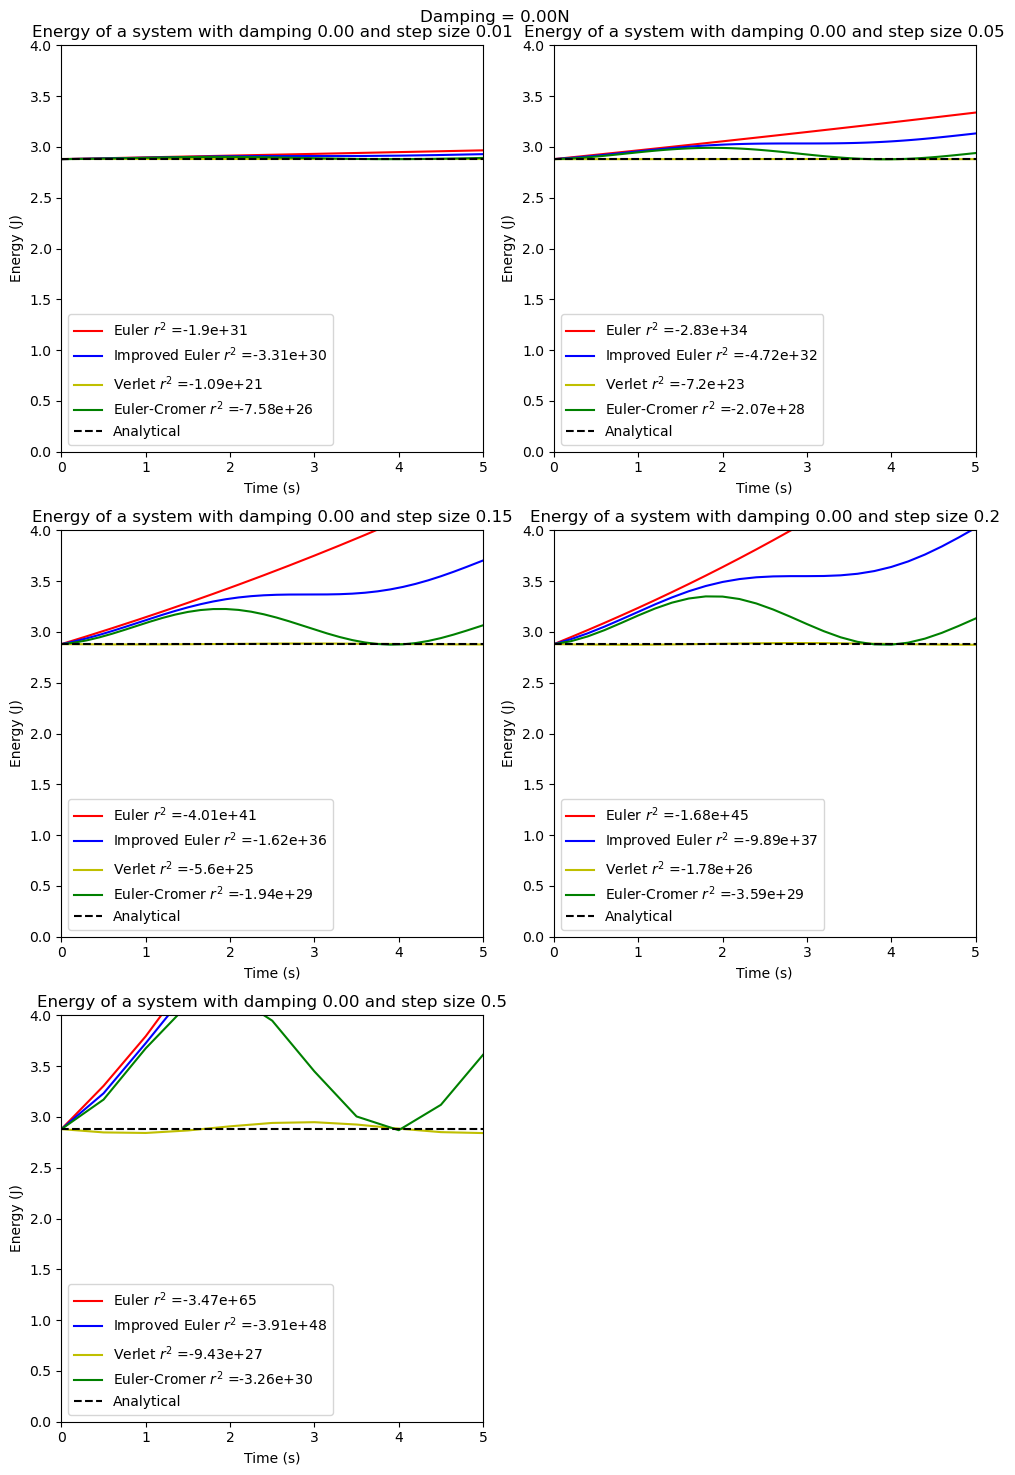

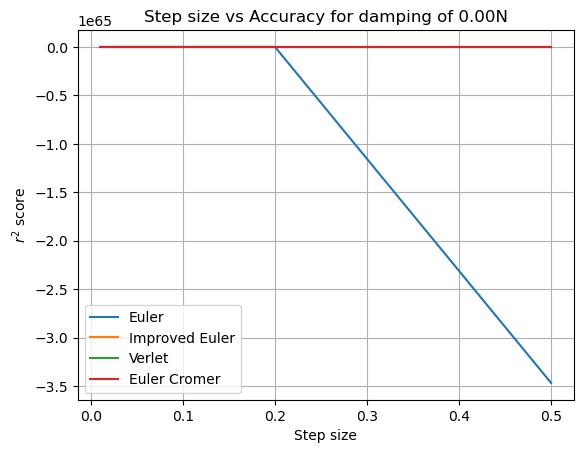

<Figure size 1000x1500 with 0 Axes>

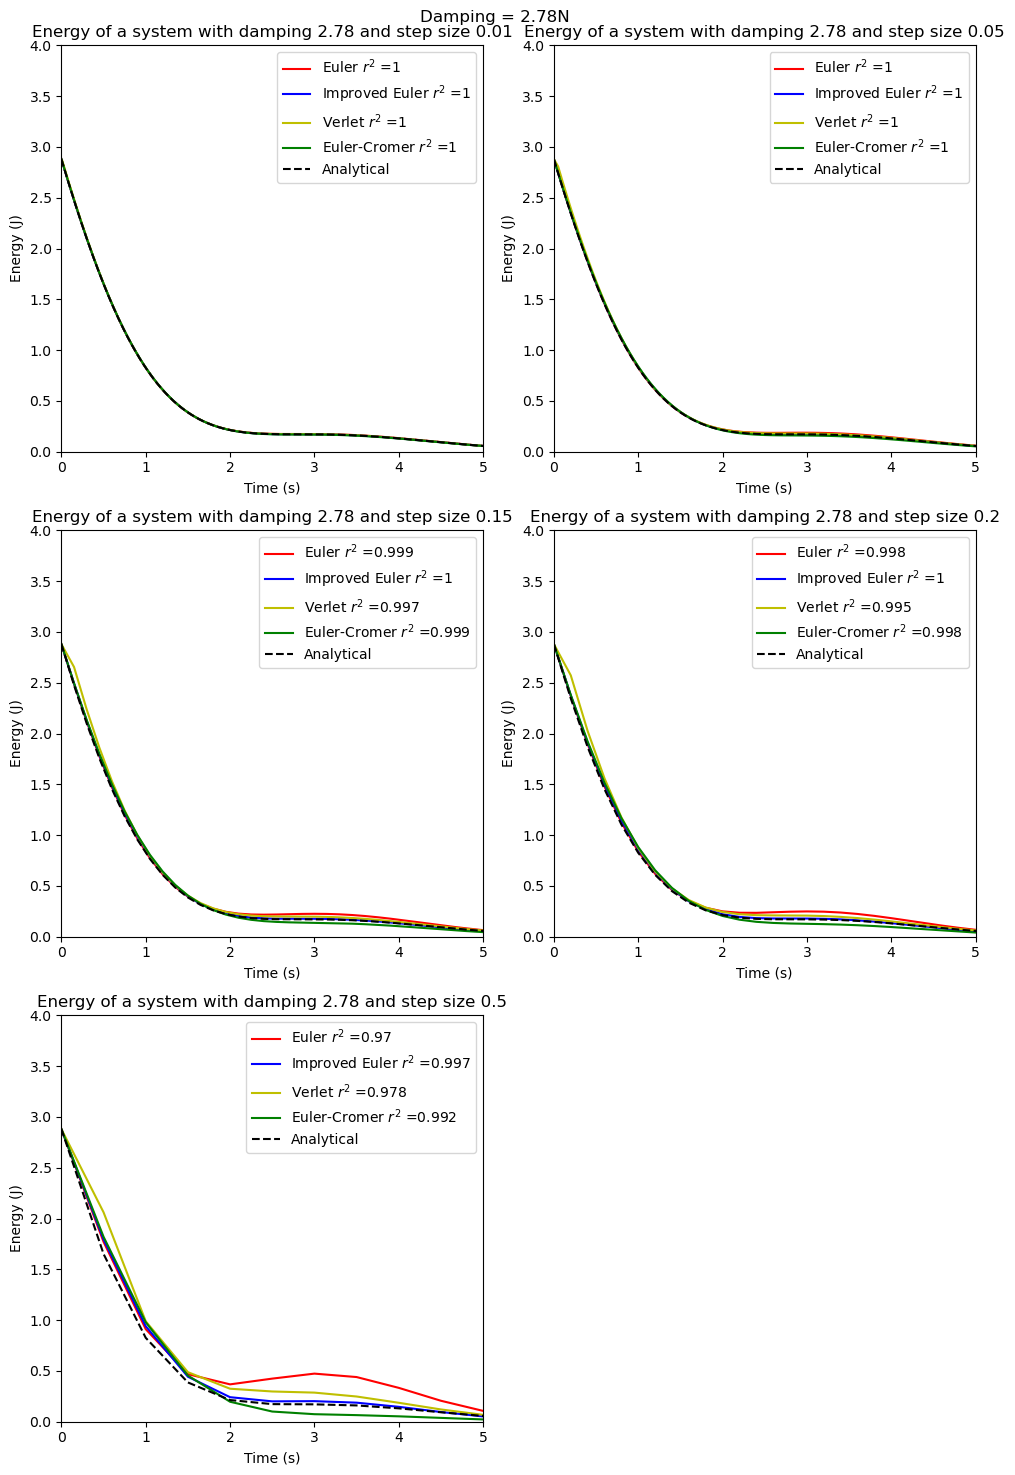

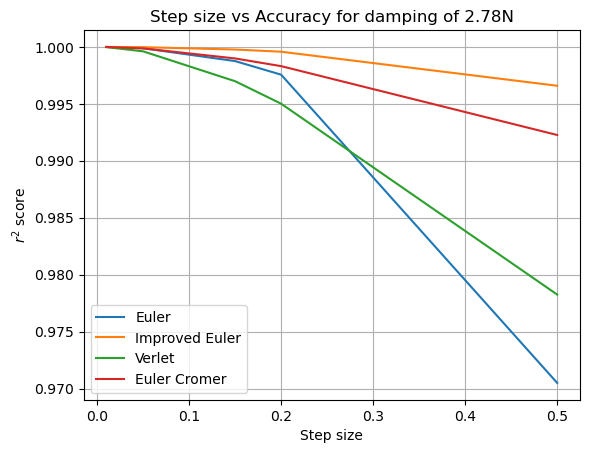

<Figure size 1000x1500 with 0 Axes>

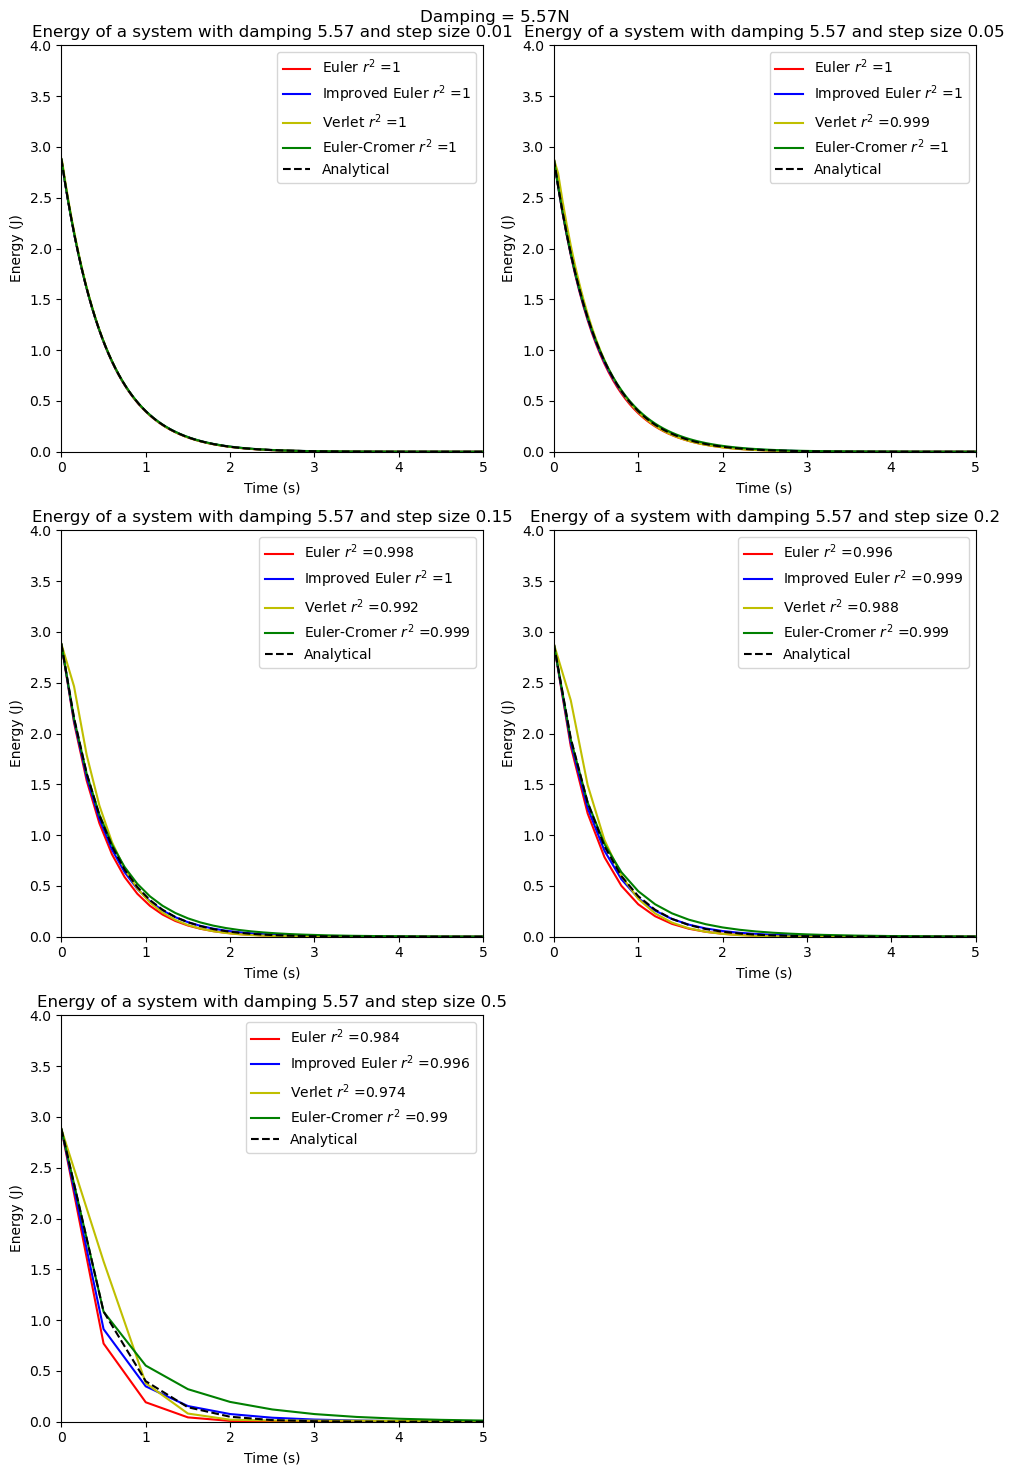

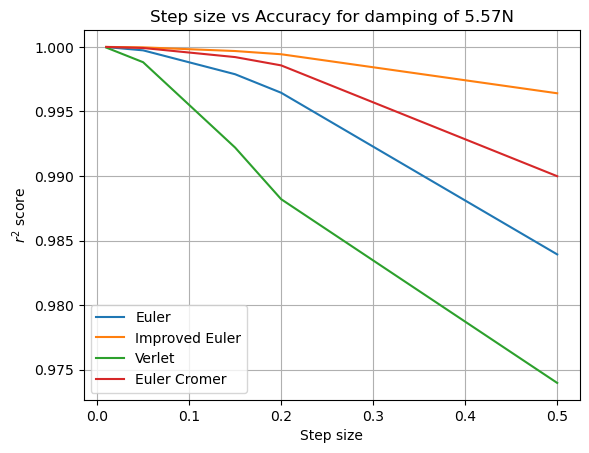

<Figure size 1000x1500 with 0 Axes>

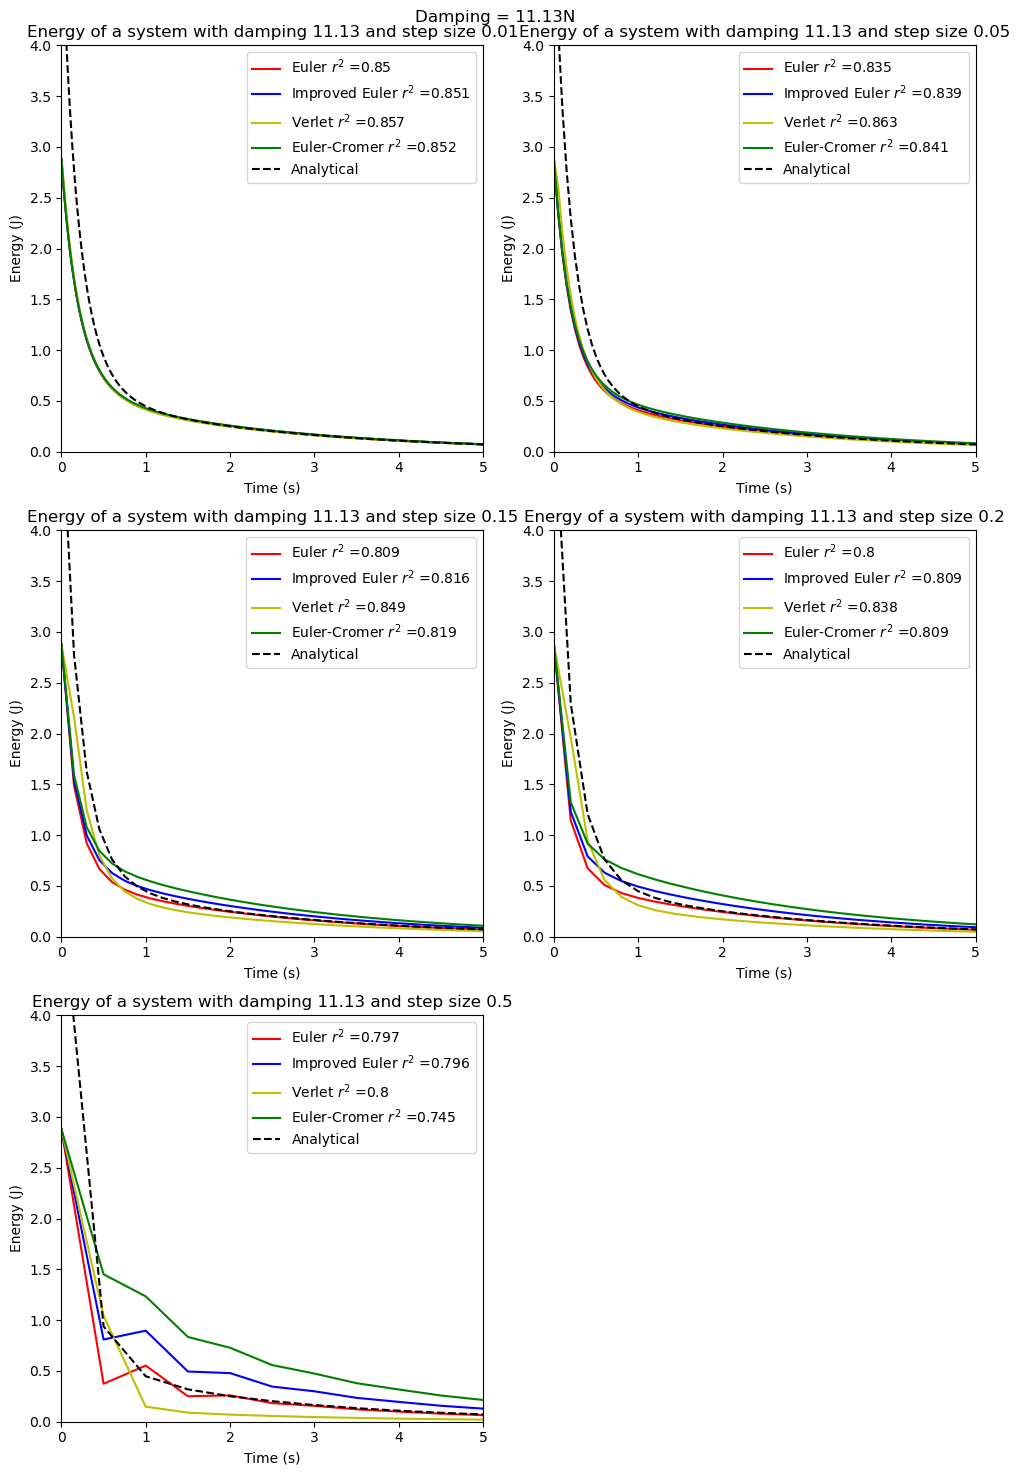

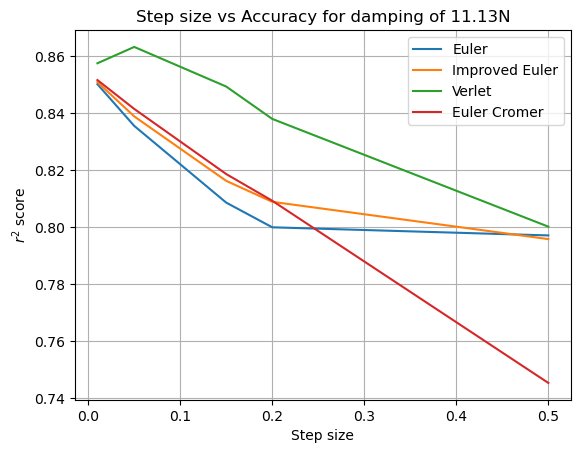

In [41]:
# Simulation parameters
h = [0.01, 0.05, 0.15, 0.2, 0.5]           # time steps
T = 150           # total time (s)

# Initial conditions
x0 = 1.0         # initial position (m)
v0 = -1.0        # initial velocity (m/s)

damping_constants = [0, 0.5*np.sqrt(4*k*m), np.sqrt(4*k*m), 2*np.sqrt(4*k*m)]


for b in damping_constants:
    #Create empty lists for the r sqaured scores
    r_2_euler = [] 
    r_2_improved_euler = [] 
    r_2_verlet = [] 
    r_2_euler_cromer = [] 
    
    #Create empty lists for the r sqaured scores
    r_2_euler = [] 
    r_2_improved_euler = [] 
    r_2_verlet = [] 
    r_2_euler_cromer = [] 
    fig = plt.figure(figsize=(10,15))

    if len(h)%2 == 0: #Gets the number of rows for 2 columns of graphs
        row_num = int(len(h)/2)
    else:
        row_num = int((len(h)+1)/2)
        
    fig = plt.figure(figsize=(10,15)) #Creates the a blank sheet for energy vs time
    fig.suptitle(f'Damping = {b:.2f}N', fontsize='large')
    for i in range(len(h)): #iterates through the different step sizes
        n_steps = int(T/h[i])
        times = np.arange(0,h[i]*n_steps,h[i])

        X, V = Analytic(x0, v0, times, b) 
        e_analytical = calc_energy(X, V)

        e_euler, e_improved_euler,e_verlet, e_euler_cromer = get_predicted_energies(x0, v0, h[i], n_steps, b)  

        r_2_euler.append(r2_score(e_analytical, e_euler))
        r_2_improved_euler.append(r2_score(e_analytical, e_improved_euler))
        r_2_verlet.append(r2_score(e_analytical, e_verlet))
        r_2_euler_cromer.append(r2_score(e_analytical, e_euler_cromer))    

        plt.subplot(row_num,2,i+1) #Creates the graph on the blank sheet
        plot_energy_graph(e_euler, e_improved_euler, e_verlet, e_euler_cromer, e_analytical, times, h[i], b) #Plots the graph

    plt.tight_layout() 
    plt.show()
    
    plt.plot(h, r_2_euler, label = 'Euler')
    plt.plot(h, r_2_improved_euler, label = 'Improved Euler')
    plt.plot(h, r_2_verlet, label = 'Verlet')
    plt.plot(h, r_2_euler_cromer, label = 'Euler Cromer')
    plt.xlabel('Step size')
    plt.ylabel(r'$r^{2}$ score')
    plt.title(f'Step size vs Accuracy for damping of {b:.2f}N')

    plt.legend()
    plt.grid()
    plt.show()

#R squared values not plotted as they were all so large

As we can see from the graphs, only the Verlet and Euler-Cromer do not increment the energy of the system as time passes, though the fact that they both oscillate means that neither of them are truly accurate. For this reason, the method used later should be one of these.

In general, the Euler-Cromer method acted better than the Verlet method so it was used with a step size of 0.2 as this seemed fairly accurate

Impact of a single driving force at a given time is coded below

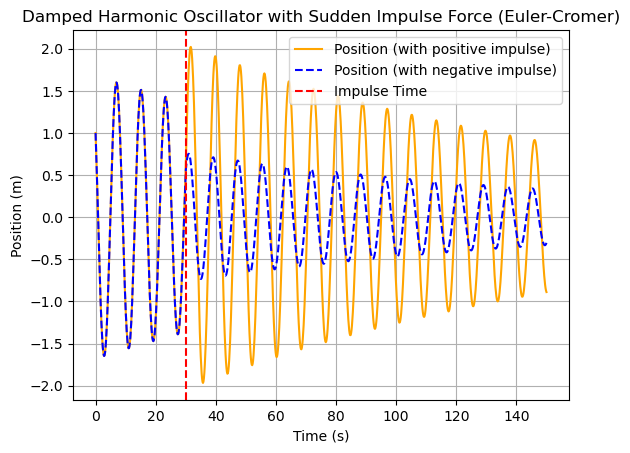

In [42]:
# Initial conditions
x0 = 1.0         # initial position (m)
v0 = -1.0        # initial velocity (m/s)

b = 0.05

# Time settings
h = 0.15            # Time step (s)
T = 150              # Total time (s)
n_steps = int(T / h)


# Impulse settings
t_push = 30       # Time at which the impulse occurs (s)
F_push = 1.0        # Magnitude of the impulse force (N)

t = np.linspace(0, T, n_steps)
x_pos = np.zeros(n_steps)
v_pos = np.zeros(n_steps)

x_neg = np.zeros(n_steps)
v_neg = np.zeros(n_steps)

x_pos[0] = x0
v_pos[0] = v0

x_neg[0] = x0
v_neg[0] = v0

# Time evolution (Euler-Cromer method with impulse)
for i in range(n_steps - 1):
    F_ext = 0
    
    # Apply the impulse force at the chosen time
    if abs(t[i] - t_push) < h:
        F_ext = F_push / h  # Approximate impulse as a large force in one time step
    
    # Update velocity and position for positive force with Euler-Cromer
    a_pos = (F_ext - b * v_pos[i] - k * x_pos[i]) / m
    v_pos[i + 1] = v_pos[i] + h * a_pos
    x_pos[i + 1] = x_pos[i] + h * v_pos[i + 1]
    
    # Update velocity and position for positive force with Euler-Cromer
    a_neg = (-F_ext - b * v_neg[i] - k * x_neg[i]) / m
    v_neg[i + 1] = v_neg[i] + h * a_neg
    x_neg[i + 1] = x_neg[i] + h * v_neg[i + 1]

# Plotting the result
plt.plot(t, x_pos, label='Position (with positive impulse)', color = 'orange')
plt.plot(t, x_neg, label='Position (with negative impulse)', linestyle='--', color = 'blue')
plt.axvline(t_push, color='red', linestyle='--', label='Impulse Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Damped Harmonic Oscillator with Sudden Impulse Force (Euler-Cromer)')
plt.legend()
plt.grid()
plt.show()



Impact of a driving force with different frequency is given below

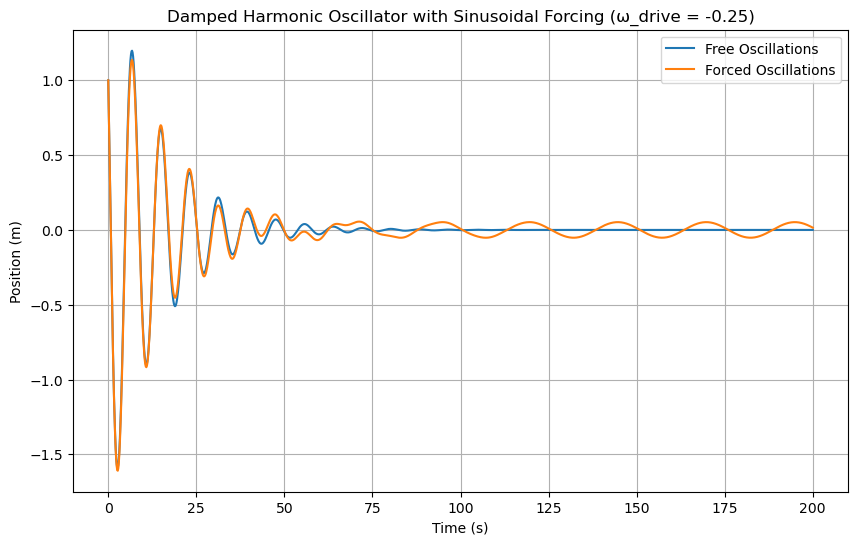

In [58]:
# Initial conditions
x0 = 1         # initial position (m)
v0 = -1.3        # initial velocity (m/s)

b = 0.5

# Time settings
h = 0.15            # Time step (s)
T = 200              # Total time (s)
n_steps = int(T / h)

# Initial conditions
F0 = 0.1
omega_drive = -0.25

t = np.linspace(0, T, n_steps)
x = np.zeros(n_steps)
v = np.zeros(n_steps)
x_forced = np.zeros(n_steps)
v_forced = np.zeros(n_steps)

x[0] = x0
v[0] = v0

x_forced[0] = x0
v_forced[0] = v0

# Time evolution (Euler-Cromer method with sinusoidal force)
for i in range(n_steps - 1):
    # Sinusoidal external force
    F_ext = F0 * np.sin(omega_drive * (t[i]+h))
    
    # Update velocity and position with Euler-Cromer
    _a_forced = (F_ext - b * v_forced[i] - k * x_forced[i]) / m
    v_forced[i + 1] = v_forced[i] + h * _a_forced
    x_forced[i + 1] = x_forced[i] + h * v_forced[i + 1]
    _a = (- b * v[i] - k * x[i]) / m
    v[i + 1] = v[i] + h * _a
    x[i + 1] = x[i] + h * v[i + 1] 

    v[i+1] = v[i] - h * k * x[i] / m - h*b*v[i]/m
    x[i+1] = x[i] + h * v[i+1]
    
# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(t, x, label = 'Free Oscillations')
plt.plot(t, x_forced, label = 'Forced Oscillations')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title(f'Damped Harmonic Oscillator with Sinusoidal Forcing (ω_drive = {omega_drive:.2f})')
plt.grid()
plt.legend()
plt.show()


Here we can see a period of residuals before the frequency evens out into a transient response

Here we are plotting a graph of the Amplitude of the wave given the frequency of the driving force

The amplitude is given by finding the maximum displacement of the wave during the transient period.

It is then compared with the formula for amplitude from theory:

$A = \frac{F_{0}}{m(ω^{2}-ω_{0}^{2})^{2}-γ^{2}ω^{2}}$

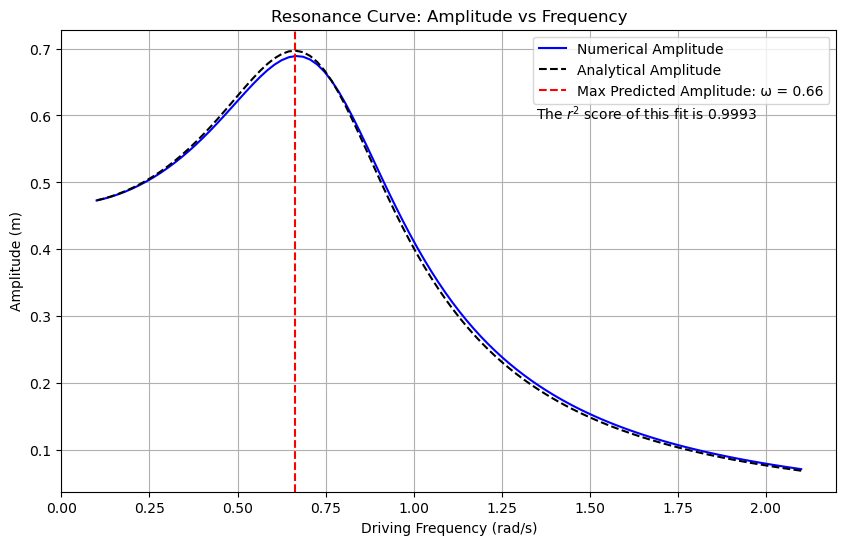

In [44]:
# Initial conditions
x0 = 1         # initial position (m)
v0 = -2        # initial velocity (m/s)
b = 2          # damping coefficient (kg/s)

# Time settings
h = 0.1            # Time step (s)
T = 1000           # Total time (s)
n_steps = int(T / h)

# Defining force
F0 = 1            # Amplitude of the driving force (N)

# Natural frequency and damping factor
gamma = b / m
omega_0 = np.sqrt(k / m)
omega_d = np.sqrt(omega_0**2 - (gamma**2 / 4))  # Damped natural frequency

# Frequency sweep
omega_values = np.linspace(0.1, 2.1, 100)
amplitudes = []
analytical_amplitudes = []

# Loop over frequencies for numerical solution
for omega_drive in omega_values:
    t = np.linspace(0, T, n_steps)
    x = np.zeros(n_steps)
    v = np.zeros(n_steps)
    
    # Initial conditions
    x[0] = x0
    v[0] = v0
    
    # Time evolution (Euler-Cromer method)
    for i in range(n_steps - 1):
        F_ext = F0 * np.cos(omega_drive * t[i])
        a = (F_ext - b * v[i] - k * x[i]) / m
        v[i + 1] = v[i] + h * a
        x[i + 1] = x[i] + h * v[i + 1]
        
    # Measure amplitude after transients (last 90% of data)
    amplitude = np.max(np.abs(x[int(0.1 * n_steps):]))
    amplitudes.append(amplitude)

# Analytical solution for steady-state amplitude
for omega_drive in omega_values:
    denominator = np.sqrt((k - m * omega_drive**2)**2 + (b * omega_drive)**2)
    analytical_amplitudes.append(abs(F0 / denominator))
    
# Predicted peak frequency considering damping
omega_max_pred = omega_0 * np.sqrt(1 - (gamma**2 / (2 * omega_0**2)))

#Getting the r squared value
r_2_score = r2_score(analytical_amplitudes, amplitudes)

# Plotting resonance curve
plt.figure(figsize=(10, 6))
plt.plot(omega_values, amplitudes, 'b-', label='Numerical Amplitude')
plt.plot(omega_values, analytical_amplitudes, 'k--', label='Analytical Amplitude')
plt.axvline(omega_max_pred, color='red', linestyle='--', label=f'Max Predicted Amplitude: ω = {omega_max_pred:.2f}')
plt.xlabel('Driving Frequency (rad/s)')
plt.ylabel('Amplitude (m)')
plt.title('Resonance Curve: Amplitude vs Frequency')
plt.figtext(0.6,0.73,r'The $r^{2}$ score of this fit is ' + f'{r_2_score:.4f}', fontsize = 10)
plt.legend()
plt.grid()
plt.show()




This gives us quite an accurate result as the $r^{2}$ value is very close to 1

In an actual system, we would have a component of resistent due to air resistance that is dependent on $v^{2}$
The euler, improved euler and euler-cromer methods have all been modified to add this term (c)

In [45]:
#Defining Euler's method
def euler_method1(x_0, v_0, h, n_steps, b, c):
    global k
    global m
    # Create empty arrays with length n_steps for the values of x and v
    x = np.zeros(n_steps) 
    v = np.zeros(n_steps) 
    
    # Assign initial conditions
    x[0] = x_0
    v[0] = v_0

    
    #Calculating the values of x and v after each iteration
    for i in range(n_steps-1):
        _a = -(k/m)* x[i] - (b/m)*v[i] -c*v[i]*abs(v[i])/m #Calculate acceleration
        x[i+1] = x[i] + h * v[i]
        v[i+1] = v[i] + h * _a
    return x, v

In [46]:
#Defining Improved Euler's method
def improved_euler_method1(x_0, v_0, h, n_steps, b, c):
    global k
    global m
    # Create empty arrays with length n_steps for the values of x and v
    x = np.zeros(n_steps) 
    v = np.zeros(n_steps) 
    
    # Assign initial conditions
    x[0] = x_0
    v[0] = v_0
    
    #Calculating the values of x and v after each iteration
    for i in range(n_steps-1):
        _a = -k* x[i]/m - b*v[i]/m -c*v[i]*abs(v[i])/m #Calculate acceleration
        x[i+1] = x[i] + h * v[i] + (h**2)*_a/2
        v[i+1] = v[i] + h * _a
    return x, v

In [47]:
def verlet_method1(x_0, v_0, h, n_steps, b, c): #Using a vel
    global k
    global m
    # Create empty arrays with length n_steps for the values of x and v
    x = np.zeros(n_steps) 
    v = np.zeros(n_steps)   
    #Obtaining a second position as velet is not self-starting
    initial_x, initial_v = improved_euler_method1(x_0, v_0, h, n_steps, b, c)
    x[0], x[1], v[0] = initial_x[0], initial_x[1], initial_v[0]
    
    #Defining constants in equation for position
    _C = 2*m+b*h
    _B = (b*h-2*m)/_C
    _A = 2*(2*m-k*h**2)/_C
    
    #Calculating the values of x and v after each iteration
    for i in range(1,n_steps-1):
        x[i+1] = _A*x[i]+_B*x[i-1]
        v[i] = (x[i+1] - x[i-1])/(2*h)
    return x, v  

In [48]:
#Defining Euler-Cromer method
def euler_cromer_method1(x_0, v_0, h, n_steps, b,c):
    global k
    global m
    # Create empty arrays with length n_steps for the values of x and v
    x = np.zeros(n_steps) 
    v = np.zeros(n_steps) 
    
    # Assign initial conditions
    x[0] = x_0
    v[0] = v_0
    
    #Calculating the values of x and v after each iteration
    for i in range(n_steps-1):
        a = (-b * v[i] - c * v[i] * abs(v[i]) - k * x[i]) / m
        v[i+1] = v[i] + h * a
        x[i+1] = x[i] + h * v[i+1]
    return x, v

A new function to display these graphs has also been created

In [54]:
def plot_graph(x0, v0, h, n_steps, b, c): 
    (x_euler, v_euler) = euler_method1(x0, v0, h, n_steps, b, c)
    (x_improved_euler, v_improved_euler) = improved_euler_method1(x0, v0, h, n_steps, b, c)
    (x_verlet, v_verlet) = verlet_method1(x0, v0, h, n_steps, b, c)
    (x_euler_cromer, v_euler_cromer) = euler_cromer_method1(x0, v0, h, n_steps, b, c)  
    
    # calc the analytic solution 
    x_analytical, _ = Analytic(x0, v0, np.arange(0,T,h), b) 

    # plot the outcome by displaying the position only 
    plt.plot(np.arange(0,T,h), x_euler,'r', label = 'Euler')
    plt.plot(np.arange(0,T,h), x_improved_euler,'b', label = 'Improved Euler')
    plt.plot(np.arange(0,T,h), x_verlet,'y', label = 'Verlet')
    plt.plot(np.arange(0,T,h), x_euler_cromer,'g', label = 'Euler-Cromer')
    plt.plot(np.arange(0,T,h), x_analytical, 'k--', label = 'Analytical (no air resistance)')

    # labeling plot 
    plt.title(f'Oscillation of a system with quadratic damping {c:.2f}')
    plt.xlabel("t (s)")
    plt.ylabel("x (mm)")

    # setting the range displayed
    plt.xlim(0, 10)
    plt.ylim(-1,3)
    plt.legend()

Here we are creating graphs displaying the impact of various factors of the quadratic damping term

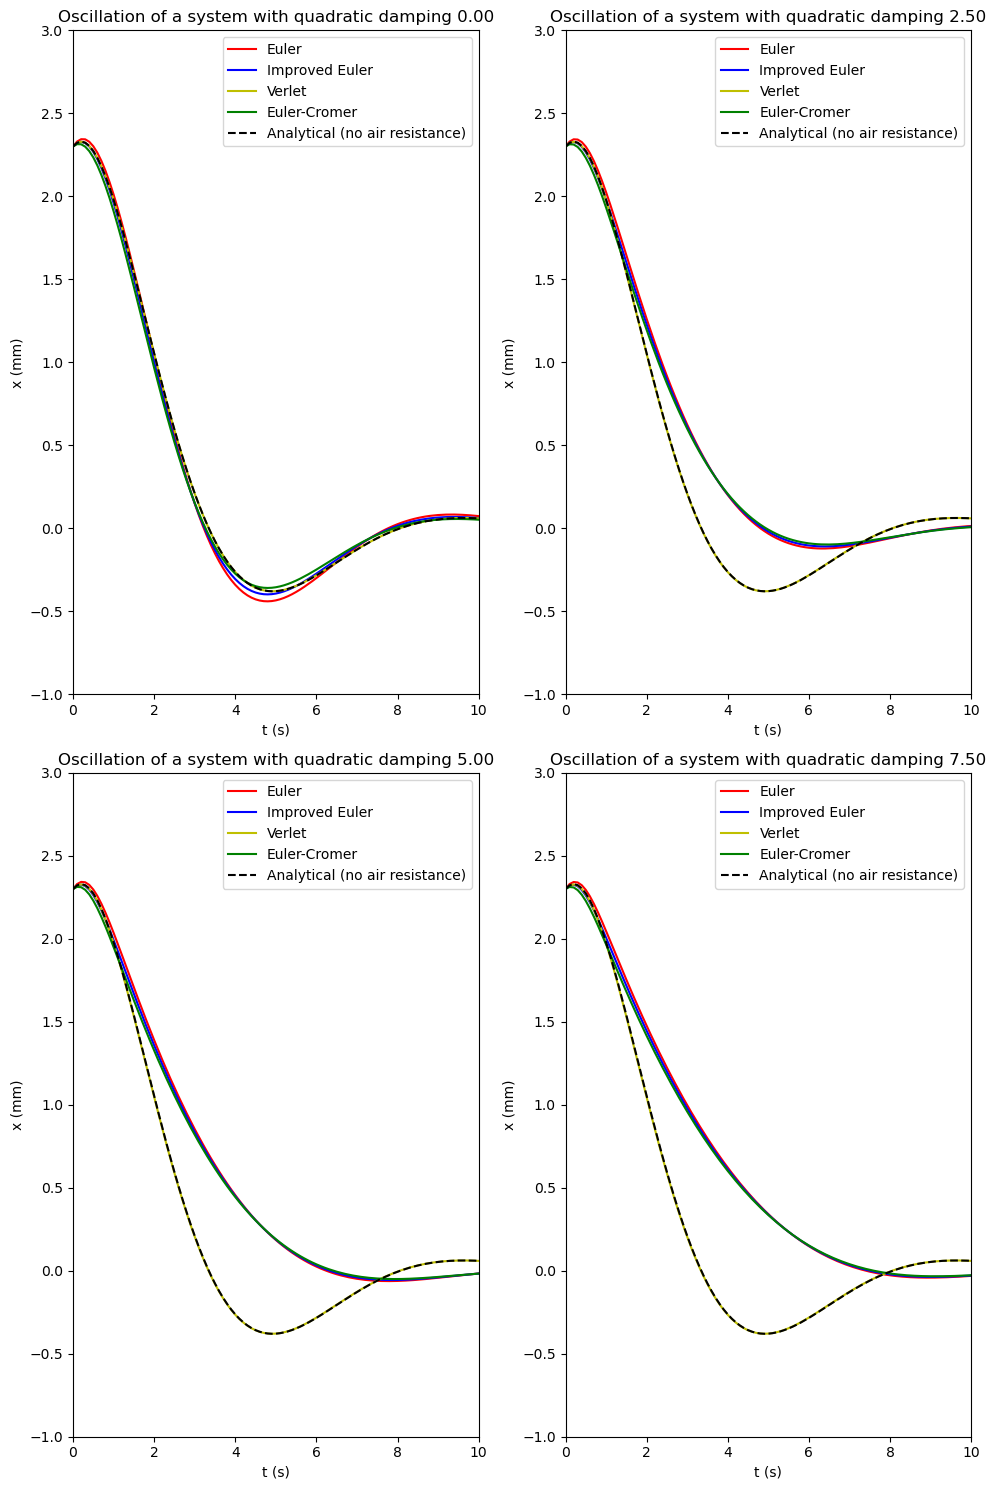

In [55]:
# Simulation parameters
h = 0.1           # time step (s)
T = 30           # total time (s)
n_steps = int(T/h)

# Initial conditions
x0 = 2.3         # initial position (m)
v0 = 0.3        # initial velocity (m/s)

b = 0.5*np.sqrt(4*k*m)
c = [0,2.5,5,7.5]

fig = plt.figure(figsize=(10,15))
for i in range(len(c)):
    plt.subplot(2,2,i+1)
    plot_graph(x0, v0, h, n_steps, b, c[i])
    
plt.tight_layout() 
plt.show()


As can be seen from the graph, the quadratic damping term means that the objects oscillates more slowly when it is present and reaches equilibrium faster

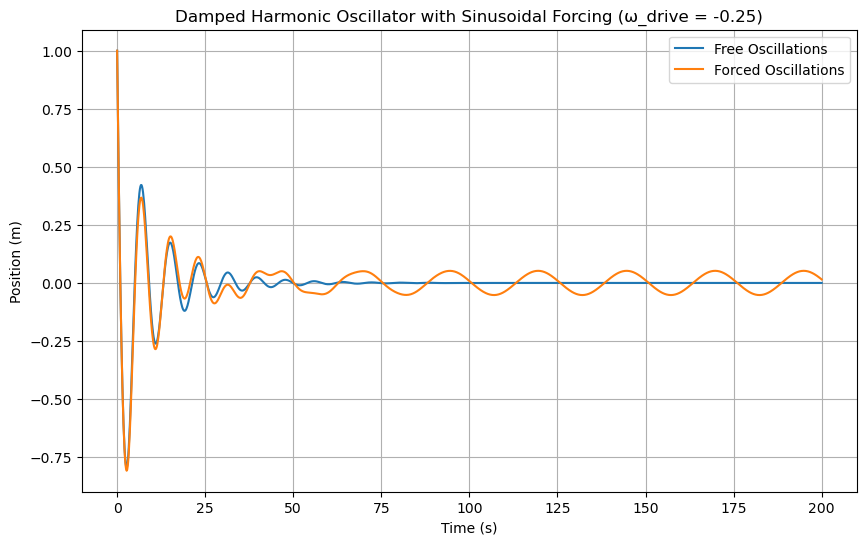

In [59]:
# Initial conditions
x0 = 1         # initial position (m)
v0 = -1.3        # initial velocity (m/s)

b = 0.5
c = 1.5

# Time settings
h = 0.15            # Time step (s)
T = 200              # Total time (s)
n_steps = int(T / h)

# Initial conditions
F0 = 0.1
omega_drive = -0.25

t = np.linspace(0, T, n_steps)
x = np.zeros(n_steps)
v = np.zeros(n_steps)
x_forced = np.zeros(n_steps)
v_forced = np.zeros(n_steps)

x[0] = x0
v[0] = v0

x_forced[0] = x0
v_forced[0] = v0

# Time evolution (Euler-Cromer method with sinusoidal force)
for i in range(n_steps - 1):
    # Sinusoidal external force
    F_ext = F0 * np.sin(omega_drive * (t[i]+h))
    
    # Update velocity and position with Euler-Cromer for forced oscillations
    _a_forced = (F_ext - b * v_forced[i] - c * v_forced[i]*abs(v_forced[i]) - k * x_forced[i]) / m
    v_forced[i + 1] = v_forced[i] + h * _a_forced
    x_forced[i + 1] = x_forced[i] + h * v_forced[i + 1]
    
    # Update velocity and position with Euler-Cromer for free oscillations
    _a = (- b * v[i] -c * v[i] * abs(v[i]) - k * x[i]) / m
    v[i + 1] = v[i] + h * _a
    x[i + 1] = x[i] + h * v[i + 1] 
    
# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(t, x, label = 'Free Oscillations')
plt.plot(t, x_forced, label = 'Forced Oscillations')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title(f'Damped Harmonic Oscillator with Sinusoidal Forcing (ω_drive = {omega_drive:.2f})')
plt.grid()
plt.legend()
plt.show()


We can see here that the quadratic damping term means that the oscillator reaches the transient period a little faster. Additionally, there are far fewer oscillations before it has reached this point

Finally, we also create a graph showing the amplitude vs. the driving frequency

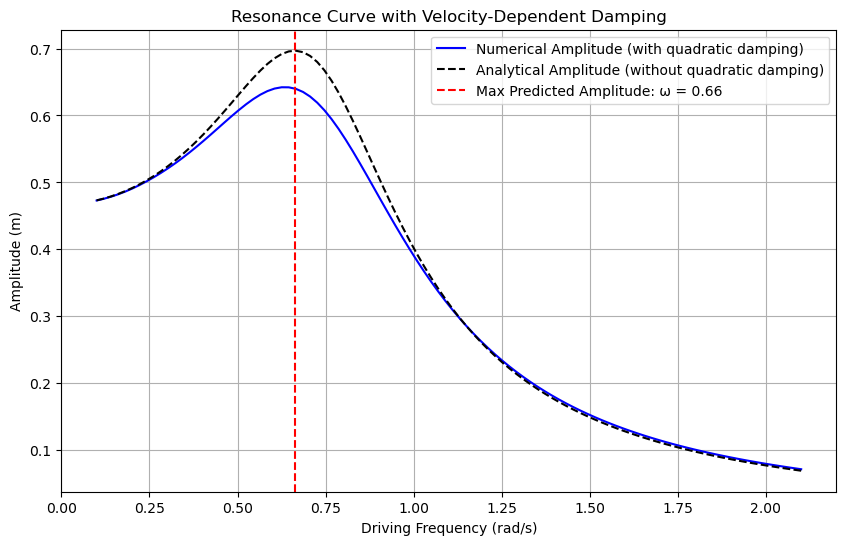

In [61]:
# Defining constant parameters 
m = 3.62         # mass (kg)
k = 2.14         # spring constant (N/m)

# Initial conditions
x0 = 0         # initial position (m)
v0 = -1        # initial velocity (m/s)
b = 2          # linear damping coefficient (kg/s)
c = 0.5        # quadratic damping coefficient (kg/m)

# Time settings
h = 0.1            # Time step (s)
T = 1000           # Total time (s)
n_steps = int(T / h)

# Defining force
F0 = 1            # Amplitude of the driving force (N)

# Natural frequency and damping factor
gamma = b / m
omega_0 = np.sqrt(k / m)

# Frequency sweep
omega_values = np.linspace(0.1, 2.1, 100)
amplitudes = []
analytical_amplitudes = []

# Loop over frequencies for numerical solution
for omega_drive in omega_values:
    t = np.linspace(0, T, n_steps)
    x = np.zeros(n_steps)
    v = np.zeros(n_steps)
    
    # Initial conditions
    x[0] = x0
    v[0] = v0
    
    # Time evolution (Euler-Cromer method)
    for i in range(n_steps - 1):
        F_ext = F0 * np.cos(omega_drive * t[i])
        a = (F_ext - b * v[i] - c * v[i] * abs(v[i]) - k * x[i]) / m  # Quadratic damping added
        v[i + 1] = v[i] + h * a
        x[i + 1] = x[i] + h * v[i + 1]
        
    # Measure amplitude after transients (last 90% of data)
    amplitude = np.max(np.abs(x[int(0.1 * n_steps):]))
    amplitudes.append(amplitude)

# Analytical solution for steady-state amplitude (without quadratic damping)
for omega_drive in omega_values:
    denominator = np.sqrt((k - m * omega_drive**2)**2 + (b * omega_drive)**2)
    analytical_amplitudes.append(abs(F0 / denominator))
    
# Predicted peak frequency considering damping
omega_max_pred = omega_0 * np.sqrt(1 - (gamma**2 / (2 * omega_0**2)))

# Plotting resonance curve
plt.figure(figsize=(10, 6))
plt.plot(omega_values, amplitudes, 'b-', label='Numerical Amplitude (with quadratic damping)')
plt.plot(omega_values, analytical_amplitudes, 'k--', label='Analytical Amplitude (without quadratic damping)')
plt.axvline(omega_max_pred, color='red', linestyle='--', label=f'Max Predicted Amplitude: ω = {omega_max_pred:.2f}')
plt.xlabel('Driving Frequency (rad/s)')
plt.ylabel('Amplitude (m)')
plt.title('Resonance Curve with Velocity-Dependent Damping')
plt.legend()
plt.grid()
plt.show()



We can see that the maximum amplitude is at the same point but has a lower peak. This is consistent with theory as higher velocities experience a greater damping force